Load file with infos

In [1]:
import pandas as pd

file_path = "./projects.csv"
data = pd.read_csv(file_path)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Create finished column

In [2]:
change_boolean = {
    0 : 1,
    1 : 0
}

data["finished"] = data.unfinished.map(change_boolean)
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


Plot data with seaborn

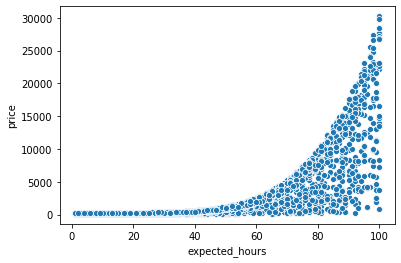

In [3]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

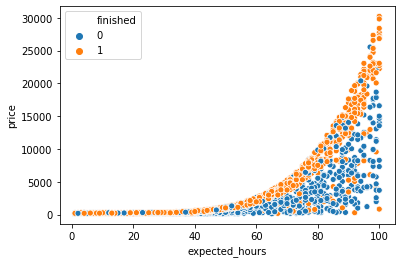

In [4]:
sns.scatterplot(x="expected_hours", y="price", hue="finished" ,data=data)

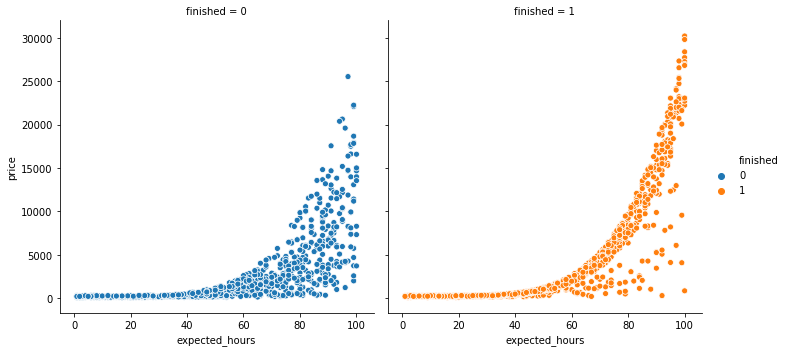

In [5]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished" ,data=data)

Prepare data, set train and test data, create a model

In [6]:
x = data[["expected_hours", "price"]]
y = data["finished"]

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

### temporary ignore warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
###

model = LinearSVC()
model.fit(train_x, train_y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Predict and calculate accuracy score

In [7]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_x)
accuracy_score_in_percent = accuracy_score(test_y, predictions) * 100
print("Accuracy score = %.2f" % accuracy_score_in_percent)

Accuracy score = 47.41


Create Baseline and calculate its accuracy score

In [8]:
import numpy as np
baseline = np.ones(540)
baseline_accuracy_score_in_percent = accuracy_score(test_y, baseline) * 100
print("Baseline accuracy score = %.2f" % baseline_accuracy_score_in_percent)

Baseline accuracy score = 52.59
